In [4]:
import numpy as np
from scipy.misc import imread, imsave, imresize
import skimage
from skimage import data
from skimage.feature import corner_harris
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from skimage import data,exposure, img_as_float
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline
from scipy.fftpack import fft, fftshift
from math import sin,cos,pi
import math

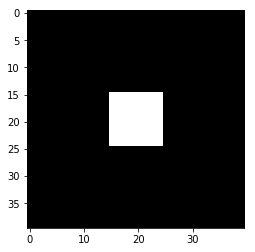

In [5]:
def generate_square():
    sq = np.zeros((40,40))
    sq[15:25,15:25] = 1
    return sq


plt.subplot(111)
plt.imshow(generate_square(), cmap='gray')

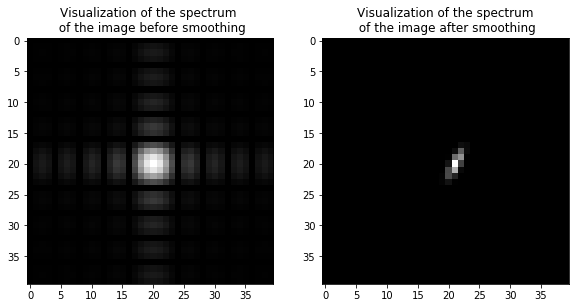

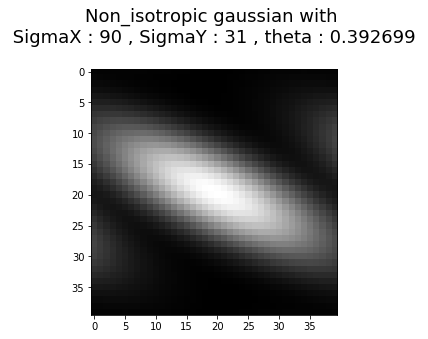

reference :
https://en.wikipedia.org/wiki/Gaussian_function
https://pdfs.semanticscholar.org/5bc5/2c83205c11bd2538721b400661e47cfba0e3.pdf


In [49]:

def frecuency_smoothing(img,sigmaX,sigmaY,Theta):
    def generate_mask_non_isotropic(shape,sigmaX,sigmaY,Theta):

        rows, cols = shape
        A = 50;
        x0 = 4; y0 = 0;
        scale = 100
        sigma_x=    (scale)/(sigmaX+1)
        sigma_y=    (scale)/(sigmaY+1)
        rows, cols = shape
        x = np.linspace(-1,1, cols) * cols
        y = np.linspace(-1,1, rows) * rows
        [X,Y] = np.meshgrid(x,y)
        theta=Theta
        a = cos(theta)**2/(2*sigma_x**2) + sin(theta)**2/(2*sigma_y**2)
        b = math.sin(2*theta)/(4*sigma_x**2) + sin(2*theta)/(4*sigma_y**2)
        c = sin(theta)**2/(2*sigma_x**2) + cos(theta)**2/(2*sigma_y**2)
        mask = A*np.exp((-1)*(a*(X-x0)**2 + 2*b*(X-x0)*(Y-y0) + c*(Y-y0)**2))
        return mask
# Visualization of the spectrum of the image before smoothing
    img=np.asarray(img)
    fft_img=np.fft.fft2(img)
    fft_img = np.fft.fftshift(fft_img)
    plt.figure(figsize=(15,15))
    plt.subplot(131)
#     20*np.log10(
    plt.imshow(abs(fft_img),cmap="gray")
    plt.title('Visualization of the spectrum \n of the image before smoothing')
    shape=img.shape
    mask = generate_mask_non_isotropic(shape,sigmaX,sigmaY,Theta)
    smoothed_image = mask * fft_img
    plt.subplot(132)
#     20*np.log10
    plt.imshow(abs(smoothed_image),cmap="gray")
    plt.title('Visualization of the spectrum\n of the image after smoothing')
    plt.show()
    out = np.fft.ifft2(np.fft.ifftshift(smoothed_image))
    smoothed_image=out
    return smoothed_image

##################################################################
from math import sin,cos,pi
import math
############################# Main() #################################
img= generate_square()
img= skimage.color.rgb2gray(img)
Image=img_as_float(img)
# parameters of non_isotropic gaussian , sigma in x and y direction and theta
SigmaX=90
SigmaY=31
theta=math.pi/8
                                                     
# our customized non_isotropic gaussian 
frecuency_smoothed=frecuency_smoothing(Image,SigmaX,SigmaY,theta)

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(np.abs(frecuency_smoothed), cmap='gray')
plt.title('Non_isotropic gaussian with \n SigmaX : %d , SigmaY : %d , theta : %f \n'% (SigmaX,SigmaY,theta),fontsize=18)
plt.show() 
print 'reference :'
print 'https://en.wikipedia.org/wiki/Gaussian_function'
print 'https://pdfs.semanticscholar.org/5bc5/2c83205c11bd2538721b400661e47cfba0e3.pdf'

